Doing all the imports

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR

Loading the whole Feature data 6 hundred thousand instances

In [2]:
Features_initial=pd.read_csv('input_training.csv',delimiter=';')

In [3]:
#Printing it
Features_initial

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c
0,1,WT3,1.0,92.470001,92.470001,92.470001,0.00,7.000000,7.000000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,294.190000,294.239990
1,2,WT3,2.0,92.470001,92.470001,92.470001,0.00,7.000000,7.000000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,297.829990,294.239990
2,3,WT3,3.0,92.470001,92.470001,92.470001,0.00,7.000000,7.000000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,322.209990,294.239990
3,4,WT3,4.0,92.470001,92.470001,92.470001,0.00,6.970000,6.700000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,318.690000,294.239990
4,5,WT3,5.0,92.470001,92.470001,92.470001,0.00,6.930000,6.000000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.500000,0.00,314.890010,294.239990
5,6,WT3,6.0,92.470001,92.470001,92.470001,0.00,6.320000,6.000000,7.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,301.709990,294.239990
6,7,WT3,7.0,92.470001,92.470001,92.470001,0.00,6.000000,6.000000,6.83,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,303.980010,294.239990
7,8,WT3,8.0,92.470001,92.470001,92.470001,0.00,5.950000,5.760000,6.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,303.780000,294.239990
8,9,WT3,9.0,92.470001,92.470001,92.470001,0.00,5.040000,5.000000,6.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.400000,2.400000,0.00,290.920010,294.239990
9,10,WT3,10.0,92.470001,92.470001,92.470001,0.00,4.110000,4.000000,5.00,...,0.000000,0.000000,0.000000,0.00,2.400000,2.350000,2.400000,0.00,287.420010,294.239990


So I am picking only 1 attribute from each type therefore reducing the data size as I am taking one column from each kind, Like for temperature I am just taking Hub temperature instead of taking Hub temp.mean Hub temp.std

In [4]:
Features = pd.read_csv('input_training.csv',usecols= (1,2,3,7,11,15,19,23,27,31,35,39,43,47,51,55,56,60,64,68,72,76,77),delimiter=';')

In [5]:
Features # now we have the features ready

,MAC_CODE,Date_time,Pitch_angle,Hub_temperature,Generator_converter_speed,Generator_speed,Generator_bearing_1_temperature,Generator_bearing_2_temperature,Generator_stator_temperature,Gearbox_bearing_1_temperature,...,Nacelle_angle,Nacelle_temperature,Absolute_wind_direction,Outdoor_temperature,Grid_frequency,Grid_voltage,Rotor_speed,Rotor_bearing_temperature,Absolute_wind_direction_c,Nacelle_angle_c
0,WT3,1.0,92.470001,7.000000,3.3800,0.1700,7.500000,7.170000,4.160000,2.560000,...,294.239990,5.720000,294.190000,-1.10,49.980000,684.07001,0.000000,2.400000,294.190000,294.239990
1,WT3,2.0,92.470001,7.000000,3.5600,0.2800,7.500000,7.200000,4.170000,2.570000,...,294.239990,5.620000,297.829990,-1.08,49.959999,686.01001,0.000000,2.400000,297.829990,294.239990
2,WT3,3.0,92.470001,7.000000,3.5100,0.0800,7.500000,7.260000,4.170000,2.570000,...,294.239990,5.410000,322.209990,-1.01,49.959999,688.17999,0.000000,2.400000,322.209990,294.239990
3,WT3,4.0,92.470001,6.970000,4.0600,0.4100,7.500000,7.260000,4.150000,2.530000,...,294.239990,5.300000,318.690000,-1.00,49.980000,689.96997,0.000000,2.400000,318.690000,294.239990
4,WT3,5.0,92.470001,6.930000,3.6100,0.2100,7.500000,7.250000,4.140000,2.520000,...,294.239990,5.340000,314.890010,-1.00,49.990002,689.87000,0.000000,2.400000,314.890010,294.239990
5,WT3,6.0,92.470001,6.320000,3.4300,0.1400,7.500000,7.150000,4.100000,2.500000,...,294.239990,6.270000,301.709990,-1.04,25.879999,355.50000,0.000000,2.400000,301.709990,294.239990
6,WT3,7.0,92.470001,6.000000,3.3900,0.1100,7.500000,7.100000,4.100000,2.500000,...,294.239990,6.100000,303.980010,-1.09,0.000000,0.00000,0.000000,2.400000,303.980010,294.239990
7,WT3,8.0,92.470001,5.950000,3.4700,0.7600,7.420000,7.090000,4.100000,2.500000,...,294.239990,5.620000,303.780000,-1.10,0.000000,0.00000,0.000000,2.400000,303.780000,294.239990
8,WT3,9.0,92.470001,5.040000,3.3900,0.0400,7.280000,6.910000,4.100000,2.500000,...,294.239990,5.110000,290.920010,-1.10,0.000000,0.00000,0.000000,2.400000,290.920010,294.239990
9,WT3,10.0,92.470001,4.110000,3.4100,0.0800,7.060000,6.800000,4.100000,2.500000,...,294.239990,4.600000,287.420010,-1.10,0.000000,0.00000,0.000000,2.400000,287.420010,294.239990


loading the Labels

In [6]:
Labels=pd.read_csv('output_training.csv',delimiter=';')

In [7]:
Labels # now the labels are ready too

,ID,TARGET
0,1,-0.703000
1,2,-0.747000
2,3,-0.791000
3,4,-0.736000
4,5,-1.055000
5,6,-0.373000
6,7,0.100000
7,8,0.100000
8,9,0.100000
9,10,0.100000


I am not taking the id column because it has no important information

In [8]:
Labels = Labels.iloc[:,[1]].values

In [9]:
Labels

array([[ -7.03000022e-01],
       [ -7.46999978e-01],
       [ -7.91000000e-01],
       ..., 
       [  1.22382800e+03],
       [  1.08655900e+03],
       [  1.14292311e+03]])

I am convertng the string value from Mac_Code column to numbers because machine doesnot understand strings and it is a very important column as it holds the value of turbine name.

In [10]:
Features.replace({'WT1': 1, 'WT2': 2, 'WT3': 3, 'WT4': 4}, inplace=True)

In [11]:
Features

,MAC_CODE,Date_time,Pitch_angle,Hub_temperature,Generator_converter_speed,Generator_speed,Generator_bearing_1_temperature,Generator_bearing_2_temperature,Generator_stator_temperature,Gearbox_bearing_1_temperature,...,Nacelle_angle,Nacelle_temperature,Absolute_wind_direction,Outdoor_temperature,Grid_frequency,Grid_voltage,Rotor_speed,Rotor_bearing_temperature,Absolute_wind_direction_c,Nacelle_angle_c
0,3,1.0,92.470001,7.000000,3.3800,0.1700,7.500000,7.170000,4.160000,2.560000,...,294.239990,5.720000,294.190000,-1.10,49.980000,684.07001,0.000000,2.400000,294.190000,294.239990
1,3,2.0,92.470001,7.000000,3.5600,0.2800,7.500000,7.200000,4.170000,2.570000,...,294.239990,5.620000,297.829990,-1.08,49.959999,686.01001,0.000000,2.400000,297.829990,294.239990
2,3,3.0,92.470001,7.000000,3.5100,0.0800,7.500000,7.260000,4.170000,2.570000,...,294.239990,5.410000,322.209990,-1.01,49.959999,688.17999,0.000000,2.400000,322.209990,294.239990
3,3,4.0,92.470001,6.970000,4.0600,0.4100,7.500000,7.260000,4.150000,2.530000,...,294.239990,5.300000,318.690000,-1.00,49.980000,689.96997,0.000000,2.400000,318.690000,294.239990
4,3,5.0,92.470001,6.930000,3.6100,0.2100,7.500000,7.250000,4.140000,2.520000,...,294.239990,5.340000,314.890010,-1.00,49.990002,689.87000,0.000000,2.400000,314.890010,294.239990
5,3,6.0,92.470001,6.320000,3.4300,0.1400,7.500000,7.150000,4.100000,2.500000,...,294.239990,6.270000,301.709990,-1.04,25.879999,355.50000,0.000000,2.400000,301.709990,294.239990
6,3,7.0,92.470001,6.000000,3.3900,0.1100,7.500000,7.100000,4.100000,2.500000,...,294.239990,6.100000,303.980010,-1.09,0.000000,0.00000,0.000000,2.400000,303.980010,294.239990
7,3,8.0,92.470001,5.950000,3.4700,0.7600,7.420000,7.090000,4.100000,2.500000,...,294.239990,5.620000,303.780000,-1.10,0.000000,0.00000,0.000000,2.400000,303.780000,294.239990
8,3,9.0,92.470001,5.040000,3.3900,0.0400,7.280000,6.910000,4.100000,2.500000,...,294.239990,5.110000,290.920010,-1.10,0.000000,0.00000,0.000000,2.400000,290.920010,294.239990
9,3,10.0,92.470001,4.110000,3.4100,0.0800,7.060000,6.800000,4.100000,2.500000,...,294.239990,4.600000,287.420010,-1.10,0.000000,0.00000,0.000000,2.400000,287.420010,294.239990


just checking the shape

In [12]:
print(Features.shape)
print(Labels.shape)

(617386, 23)
(617386, 1)


fixing nan problem or no value problem and turning all the infinite values to finite for features

In [13]:
from sklearn.preprocessing import Imputer
Features = Imputer().fit_transform(Features)

checking if nan problem is solved

In [14]:
np.any(np.isnan(Features))

False

checking if all the values are finite

In [15]:
np.all(np.isfinite(Features))

True

fixing nan problem or no value problem and turning all the infinite values to finite for Labels

In [16]:
from sklearn.preprocessing import Imputer
Labels = Imputer().fit_transform(Labels)

checking nan problem if solved

In [17]:
np.all(np.isfinite(Labels))

True

checking if all the values are finite

In [18]:
np.any(np.isnan(Labels))

False

scaling the dataset to prevent dominancy as I have values from -400 to 200000 so that large values dont dominate small values

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ft_scale = sc.fit_transform(Features)
lb_scale = sc.fit_transform(Labels)

reducing the dataset because my machine will not allow me to work with such huge(6hundred thousand) data set

In [20]:
from sklearn.utils import shuffle
features, labels = shuffle(Features, Labels, random_state=13)
number_samples = Features.shape[0] 
print (int(number_samples*0.1)) 
X, y = Features[:int(number_samples*0.1),:], Labels[:int(number_samples*0.1)]

61738


Just plotting my y to see how the values look like, even though I know it is a regression column but still wanted to show that the output is continuous so its a regression problem

(array([ 30313.,   9751.,   6522.,   4789.,   3165.,   2477.,   1623.,
          1147.,    867.,   1084.]),
 array([  -19.4799989 ,   208.07371199,   435.62742288,   663.18113377,
          890.73484466,  1118.28855555,  1345.84226644,  1573.39597733,
         1800.94968822,  2028.50339911,  2256.05711   ]),
 <a list of 10 Patch objects>)

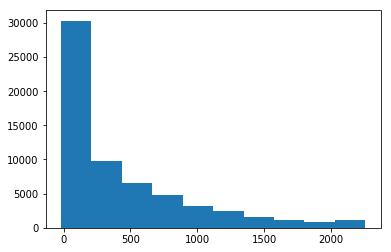

In [21]:
plt.hist(y)

The first method I am using is DecisionTreeRegressor and finding thr mean scores and std.

In [22]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X,y)
scores_DTR = cross_val_score(model_DTR,X,y,cv=5)
print(scores_DTR.mean())
print(scores_DTR.std())

0.961916098205
0.0401472720466


Shaping the y

In [23]:
y = y.ravel()
y= np.array(y).astype(int)

In [24]:
def checktraintestreg(X, y, model, ntrials =5, test_size = 0.2):

    scores_train = np.zeros(ntrials)
    scores_test = np.zeros(ntrials)

    for i in range(ntrials):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=i)
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        scores_test[i] = (metrics.r2_score(y_test,pred_test))
        scores_train[i] =(metrics.r2_score(y_train,pred_train))

    print('Training scores '+str(scores_train.mean())+' +- '+str(scores_train.std()))
    print('Test scores '+str(scores_test.mean())+' +- '+str(scores_test.std()))

Above is the checktraintest regression function and below I found the scores for train and test

In [25]:
checktraintestreg(X,y,DecisionTreeRegressor())

Training scores 1.0 +- 0.0
Test scores 0.988013148493 +- 0.000382908658987


As seen the scores came pretty good with low gap between train and test so low variance which serves our purpose(explained in report with more details

Now finding the feature importance for DecisionTreeRegressor

In [26]:
model = DecisionTreeRegressor()
model.fit(X,y)
model.feature_importances_

array([  0.00000000e+00,   3.60755529e-03,   1.18627137e-01,
         1.87111247e-04,   4.07027228e-02,   8.16325879e-01,
         1.56319781e-03,   4.52978220e-04,   1.20192300e-03,
         4.25157133e-04,   6.02015783e-04,   2.84935146e-04,
         2.30908197e-04,   2.09045445e-04,   3.35265889e-04,
         2.65768680e-04,   2.79823592e-04,   1.58671967e-04,
         3.28664727e-03,   1.05812645e-02,   2.94886133e-04,
         2.12285697e-04,   1.64820242e-04])

Feature ranking:
1. feature 5 (0.816326)
2. feature 2 (0.118627)
3. feature 4 (0.040703)
4. feature 19 (0.010581)
5. feature 1 (0.003608)
6. feature 18 (0.003287)
7. feature 6 (0.001563)
8. feature 8 (0.001202)
9. feature 10 (0.000602)
10. feature 7 (0.000453)
11. feature 9 (0.000425)
12. feature 14 (0.000335)
13. feature 20 (0.000295)
14. feature 11 (0.000285)
15. feature 16 (0.000280)
16. feature 15 (0.000266)
17. feature 12 (0.000231)
18. feature 21 (0.000212)
19. feature 13 (0.000209)
20. feature 3 (0.000187)
21. feature 22 (0.000165)
22. feature 17 (0.000159)
23. feature 0 (0.000000)


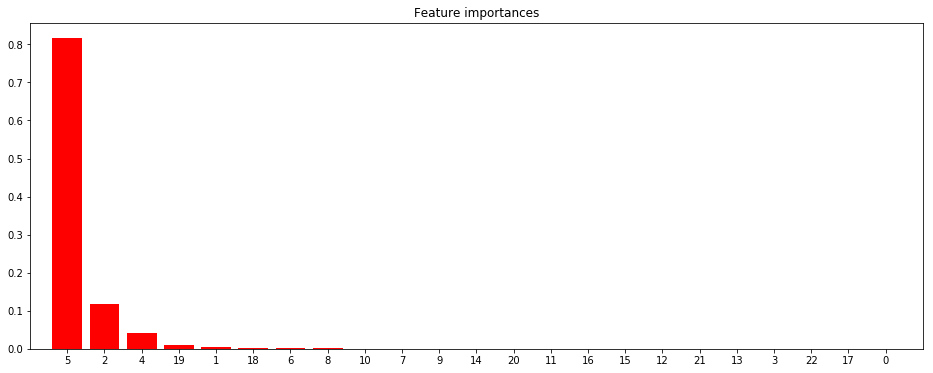

In [27]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

This is very surprising to me that only such low number of features are important

In [30]:
from sklearn.feature_selection import SelectFromModel
featuresel = SelectFromModel(model,threshold=0.040703,prefit=True)
features_new_DTR = featuresel.transform(X) #note: only features are transformed
print(features_new_DTR.shape)

(61738, 2)


checking the scores again with important features

In [31]:
checktraintestreg(features_new_DTR,y,DecisionTreeRegressor())

Training scores 0.995377016906 +- 5.8075219651e-05
Test scores 0.97512615586 +- 0.000614329472046


The next method is RandomForestRegressor

In [32]:
model_RF = RandomForestRegressor()
model_RF.fit(X,y)
scores_RF = cross_val_score(model_RF,X,y,cv=5)
print(scores_RF.mean())
print(scores_RF.std())

0.971047708555
0.0373746279092


In [33]:
checktraintestreg(X,y,RandomForestRegressor())

Training scores 0.998845522549 +- 4.1692977747e-05
Test scores 0.993174805704 +- 0.00034205798433


With RandomForestregressor the gap is lowered as expected

In [34]:
model = RandomForestRegressor()
model.fit(X,y)
model.feature_importances_

array([  0.00000000e+00,   5.16165786e-03,   1.19019116e-01,
         2.29744509e-04,   8.39386724e-02,   6.14231551e-01,
         1.58546946e-03,   3.36577780e-04,   1.27043931e-03,
         4.36897284e-04,   6.74245428e-04,   2.86422369e-04,
         2.60319168e-04,   1.91560651e-04,   3.37459937e-04,
         2.25487740e-04,   2.75974227e-04,   1.74377258e-04,
         2.56730977e-03,   1.68064373e-01,   2.99826821e-04,
         2.36945791e-04,   1.95572110e-04])

Feature ranking:
1. feature 5 (0.614232)
2. feature 19 (0.168064)
3. feature 2 (0.119019)
4. feature 4 (0.083939)
5. feature 1 (0.005162)
6. feature 18 (0.002567)
7. feature 6 (0.001585)
8. feature 8 (0.001270)
9. feature 10 (0.000674)
10. feature 9 (0.000437)
11. feature 14 (0.000337)
12. feature 7 (0.000337)
13. feature 20 (0.000300)
14. feature 11 (0.000286)
15. feature 16 (0.000276)
16. feature 12 (0.000260)
17. feature 21 (0.000237)
18. feature 3 (0.000230)
19. feature 15 (0.000225)
20. feature 22 (0.000196)
21. feature 13 (0.000192)
22. feature 17 (0.000174)
23. feature 0 (0.000000)


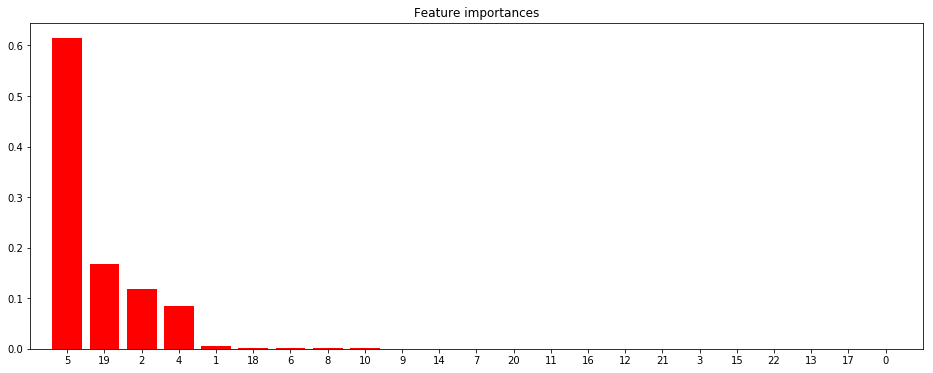

In [35]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

This is very interesting to see that the feature importance has increased 4 features and as seen more features are emerging but feature 5,19,2,4 remains te important 

In [37]:
featuresel = SelectFromModel(model,threshold=0.005162,prefit=True)
features_new_RF = featuresel.transform(X) 
print(features_new_RF.shape)

(61738, 4)


In [38]:
checktraintestreg(features_new_RF,y,DecisionTreeRegressor())

Training scores 0.999462082881 +- 2.1940344879e-05
Test scores 0.974500854324 +- 0.000970349509793


As expected gap reduced

Now doing ExtraTreesRegressor to check the scores and to check the 4 feature constant are still same or not. These feature will help in future implementation.

In [39]:
model_ETR = ExtraTreesRegressor()
model_ETR.fit(X,y)
scores_ETR = cross_val_score(model_ETR,X,y,cv=5)
print(scores_ETR.mean())
print(scores_ETR.std())

0.965744818208
0.0493134055603


In [40]:
checktraintestreg(X,y,ExtraTreesRegressor())

Training scores 1.0 +- 0.0
Test scores 0.993767015536 +- 0.000220089854282


Gap reduced more

In [41]:
model = ExtraTreesRegressor()
model.fit(X,y)
model.feature_importances_

array([  0.00000000e+00,   3.56948668e-03,   5.45119572e-02,
         9.13767956e-04,   2.75212137e-01,   1.78871593e-01,
         9.26852006e-03,   8.86762696e-04,   9.68721194e-03,
         4.95367395e-02,   7.52944351e-04,   5.08410642e-03,
         3.31118803e-04,   4.64150131e-04,   6.74295686e-03,
         4.05227441e-04,   7.27300081e-04,   3.23941283e-04,
         5.66935350e-03,   3.95655116e-01,   6.09360417e-04,
         4.00291575e-04,   3.75956369e-04])

Feature ranking:
1. feature 19 (0.395655)
2. feature 4 (0.275212)
3. feature 5 (0.178872)
4. feature 2 (0.054512)
5. feature 9 (0.049537)
6. feature 8 (0.009687)
7. feature 6 (0.009269)
8. feature 14 (0.006743)
9. feature 18 (0.005669)
10. feature 11 (0.005084)
11. feature 1 (0.003569)
12. feature 3 (0.000914)
13. feature 7 (0.000887)
14. feature 10 (0.000753)
15. feature 16 (0.000727)
16. feature 20 (0.000609)
17. feature 13 (0.000464)
18. feature 15 (0.000405)
19. feature 21 (0.000400)
20. feature 22 (0.000376)
21. feature 12 (0.000331)
22. feature 17 (0.000324)
23. feature 0 (0.000000)


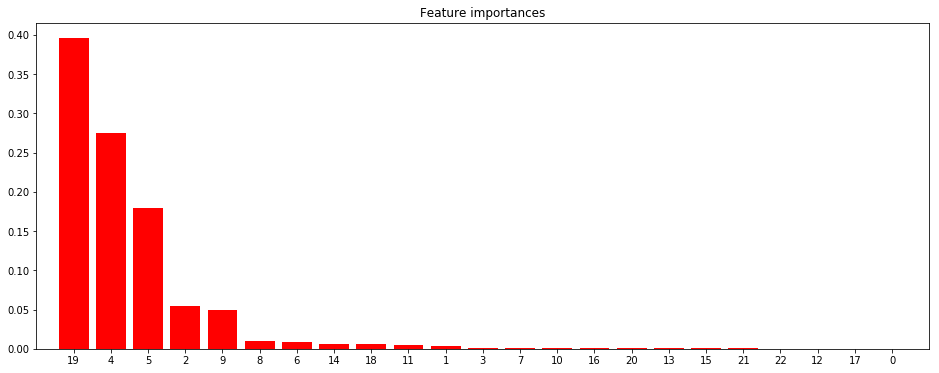

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

I see more feature importance emerging but 5,19,2,4 still remains there but this time 19 was categorized as highest important.

In [45]:
featuresel = SelectFromModel(model,threshold=0.009688,prefit=True)
features_new_ETR = featuresel.transform(X) 
print(features_new_ETR.shape) 

(61738, 5)


optimizing the parameters

In [46]:
checktraintestreg(features_new_ETR,y,ExtraTreesRegressor(n_estimators=20,n_jobs=5,min_samples_leaf=5))

Training scores 0.999999986943 +- 1.82046461801e-08
Test scores 0.983353088546 +- 0.000853426563881


Wrapping up this tree segment with important features  Mac_Code, Hub Temperature, Converter Speed, and Grid Voltage 

The next model is LinearRegression

In [62]:
model_LR = LinearRegression()
score_LR = cross_val_score(model_LR,X,y, cv=5) 
score_LR

array([ 0.88364589,  0.73382833,  0.90879714,  0.91915473,  0.89110873])

In [63]:
score_LR_predict = cross_val_predict(model_LR,X,y, cv=5) 
predicted_LiR = metrics.r2_score(y,score_LR_predict)
predicted_LiR

0.892158926289356

The r2 score looks good. Therefore it dicates that the model explains all the variability of the response data around its mean. Moving to LinearSVR.

In [58]:
from sklearn.svm import LinearSVR
model_SVR = LinearSVR()
model_SVR.fit(X,y)
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=2)
scores_SVR=cross_val_score(model_SVR,X,y)
print(scores_SVR.mean())
print(model_SVR.coef_.mean()) 
print(model_SVR.intercept_.mean())

0.174179505757
-1.21151649241
-3.21790524584


The scores,coef and intercept value came out to be good enough

The report has all the discussions